In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing dataset

yelp_df = pd.read_csv('yelp.csv')
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp_df.nunique(axis=0)

business_id     4174
date            1995
review_id      10000
stars              5
text            9998
type               1
user_id         6403
cool              29
useful            28
funny             29
dtype: int64

In [7]:
yelp_df.type.unique()

array(['review'], dtype=object)

In [8]:
yelp_df.cool.unique()

array([ 2,  0,  1,  4,  7,  3,  5, 11,  6,  8, 16, 28, 12, 13, 10, 22, 17,
       18,  9, 14, 21, 15, 19, 20, 23, 77, 27, 38, 32], dtype=int64)

<AxesSubplot: xlabel='stars', ylabel='count'>

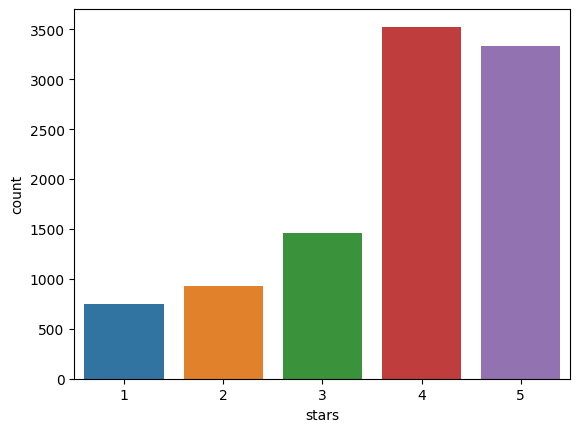

In [9]:
sns.countplot(data=yelp_df, x='stars')

In [10]:
#finding the length of the text
yelp_df['length']= yelp_df.text.apply(len)

<AxesSubplot: ylabel='Frequency'>

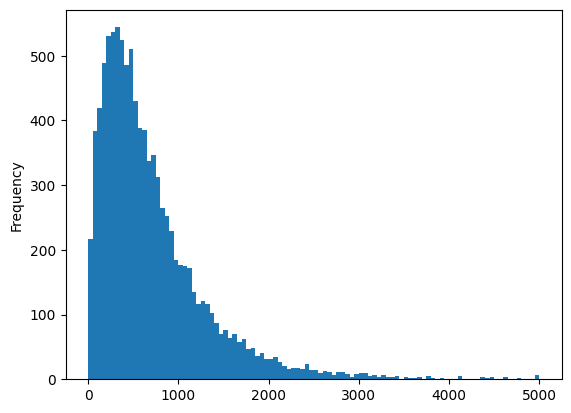

In [11]:
yelp_df.length.plot(bins=100,kind='hist')

In [12]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [13]:
#to find the longest text
yelp_df[yelp_df.length == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [14]:
#to find the shortest text
yelp_df[yelp_df.length == 1].text.iloc[0]

'X'

In [15]:
#to find the message with mean length
yelp_df[yelp_df.length == 710].text.iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

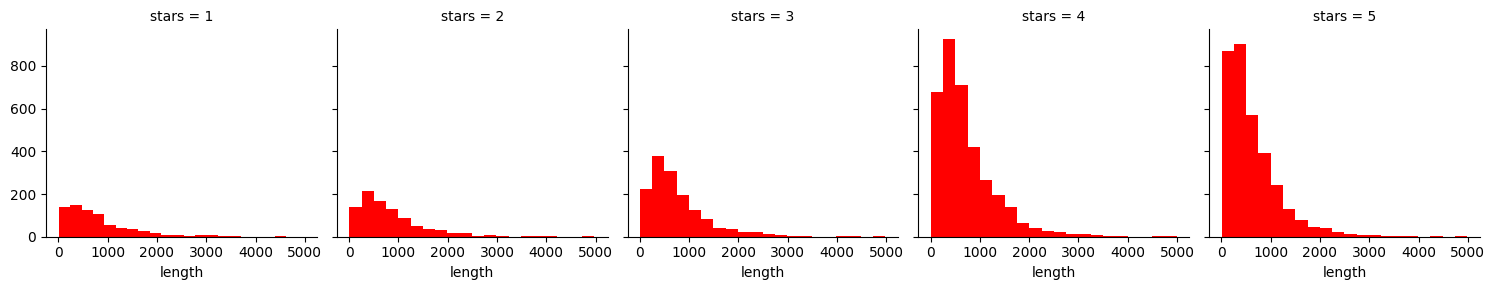

In [16]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map_dataframe(plt.hist, x='length', bins=20, color='r')

In [17]:
#dividing the dataset into reviews with 1 and 5 stars
yelp_df_1 = yelp_df[yelp_df['stars']==1]
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [18]:
yelp_df_1.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361


In [19]:
yelp_df_5.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [20]:
#merging both the datasets
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

In [21]:
yelp_df_1_5.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361


In [22]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [23]:
yelp_df_1_5.describe()

,stars,cool,useful,funny,length
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,4.266765,0.876897,1.422663,0.690651,661.938815
std,1.547868,2.336611,2.598515,1.961751,601.621371
min,1.000000,0.000000,0.000000,0.000000,6.000000
25%,5.000000,0.000000,0.000000,0.000000,256.000000
50%,5.000000,0.000000,1.000000,0.000000,489.500000
75%,5.000000,1.000000,2.000000,1.000000,878.000000
max,5.000000,77.000000,76.000000,39.000000,4986.000000


In [24]:
print(f'%of 1-star= {(len(yelp_df_1)/len(yelp_df_1_5))*100}')
print(f'%of 5-star= {(len(yelp_df_5)/len(yelp_df_1_5))*100}')

%of 1-star= 18.330885952031327
%of 5-star= 81.66911404796868


<AxesSubplot: xlabel='stars', ylabel='count'>

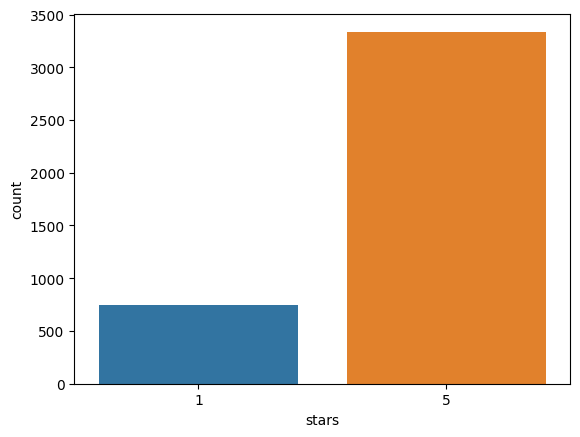

In [25]:
sns.countplot(data = yelp_df_1_5, x='stars', label='Count')

In [26]:
#removing punctuations

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
#importing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Ankit
[nltk_data]     Shaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
#creating a function to clean data and extract features

def message_cleaning(message):
    text_punc_removed = [char for char in message if char not in string.punctuation]
    text_punc_removed_join= ''.join(text_punc_removed)
    text_punc_removed_joined_clean = [words for words in text_punc_removed_join.split() if words.lower() not in stopwords.words('english')]
    return text_punc_removed_joined_clean

In [30]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [31]:
#applying countvectorizer
vectorizer = CountVectorizer(analyzer= message_cleaning)
yelp_vect = vectorizer.fit_transform(yelp_df_1_5['text']) 

In [32]:
print(vectorizer.get_feature_names())

['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

C:\Users\Ankit Shaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print(yelp_vect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
yelp_vect.shape

(4086, 26435)

In [35]:
#training the model (for testing)
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
labels = yelp_df_1_5.stars.values

In [36]:
labels

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [37]:
NB_classifier.fit(yelp_vect, labels)

MultinomialNB()

In [38]:
#dividing the data into training and testing dataset prior to training
X= yelp_vect
y=labels

In [39]:
X.shape

(4086, 26435)

In [40]:
y.shape

(4086,)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
#training the model
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [43]:
NB.fit(x_train, y_train)

MultinomialNB()

In [44]:
#evaluating the model
from sklearn.metrics import confusion_matrix, classification_report


<AxesSubplot: >

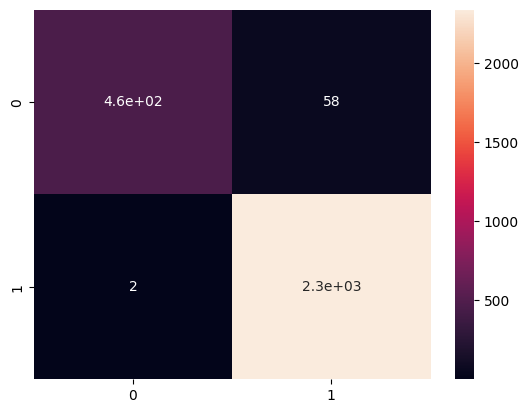

In [45]:
#testing the model with training dataset
y_predict_train = NB.predict(x_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<AxesSubplot: >

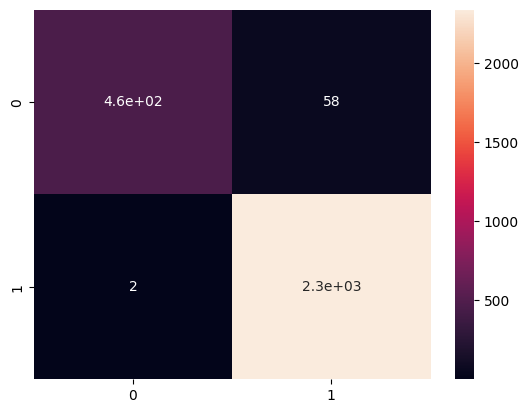

In [46]:
# evaluating the model on test dataset
y_predict = NB.predict(x_test)
cm_test = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.89      0.65      0.75       229
           5       0.92      0.98      0.95       997

    accuracy                           0.92      1226
   macro avg       0.90      0.81      0.85      1226
weighted avg       0.92      0.92      0.91      1226



In [48]:
#applying TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
yelp_tfidf = TfidfTransformer().fit_transform(yelp_vect)
print(yelp_tfidf.shape)

(4086, 26435)


In [49]:
yelp_tfidf

<4086x26435 sparse matrix of type '<class 'numpy.float64'>'
	with 222391 stored elements in Compressed Sparse Row format>

In [50]:
print(yelp_tfidf[:,:])

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

In [51]:
#re-creating and training the model with transformer
x= yelp_tfidf
y= labels

#recreating the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#recreating the model
NB_2= MultinomialNB()
NB_2.fit(x_train, y_train)

MultinomialNB()

In [52]:
y_predict_new = NB_2.predict(x_test)

<AxesSubplot: >

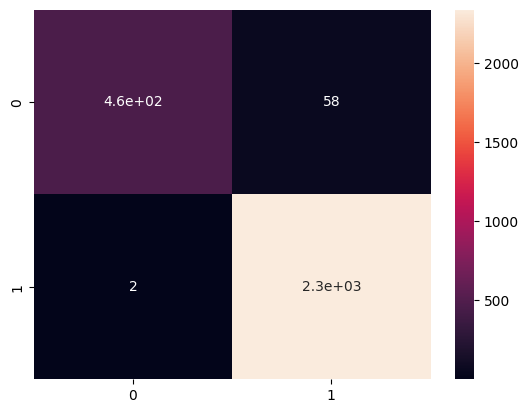

In [53]:
sm = confusion_matrix(y_test, y_predict_new)
sns.heatmap(cm, annot=True)

In [55]:
print(classification_report(y_test, y_predict_new))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       229
           5       0.81      1.00      0.90       997

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Ankit Shaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ankit Shaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ankit Shaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classif